67 127


187 127


127 67


127 187




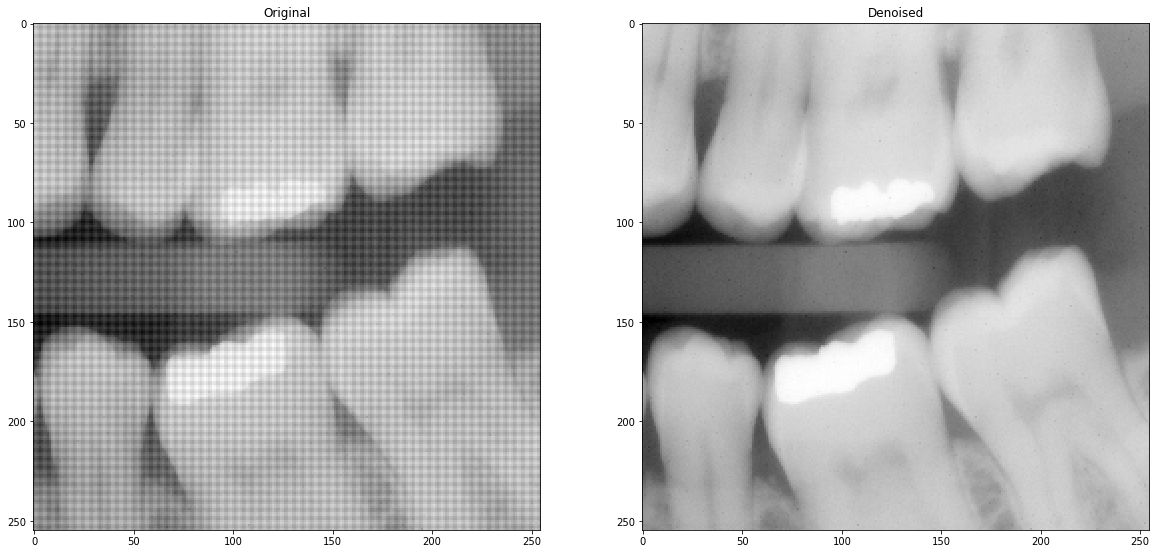

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv 

img = cv.imread('xray_checkered.png' , 0 )
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# FFT transform for image
mag, phase = cv.cartToPolar(dft_shift[:,:,0], dft_shift[:,:,1])
spectrum = np.log(mag)/20
spectrum_1 = np.copy(spectrum)
spectrum_1[75:175 , 75:175] = 0 

# finding distortion pixels and replace them with average of its 4-neighborhood 

# finding up and down distortion pixels
for i in range(img.shape[0]):
    for j in range (img.shape[1]):
        if spectrum_1[i,j]==np.max(spectrum_1):
            print(i,j)
            dft_shift[i,j] = (dft_shift[i-1,j]+dft_shift[i,j-1]+dft_shift[i+1,j]+dft_shift[i,j+1])/4
            spectrum_1[i,j] = 0
            print('\n')
# finding left and right distortion pixels
for i in range(img.shape[0]):
    for j in range (img.shape[1]):
        if spectrum_1[i,j]==np.max(spectrum_1):
            print(i,j)
            dft_shift[i,j] = (dft_shift[i-1,j]+dft_shift[i,j-1]+dft_shift[i+1,j]+dft_shift[i,j+1])/4
            print('\n')

# SHIFTING BACK CENTER
dft_ishift = np.fft.ifftshift(dft_shift)

# USE INVERSE FFT TO GET IMAGE BACK
img_back = cv.idft(dft_ishift)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])
img_back = cv.normalize(img_back, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_8U)
    

# show image and denoised image
plt.figure(figsize = (20,20))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img, cmap='gray')


plt.subplot(1, 2, 2)
plt.title('Denoised')
plt.imshow(img_back, cmap='gray')


plt.show()

cv.waitKey(0)
cv.destroyAllWindows()